### This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing price of USD/SGD past 60 day closing price.

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
#Get the stock quote
df = web.DataReader('SGD=X', data_source='yahoo', start='2015-01-01', end='2020-03-30')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,1.32483,1.31990,1.32134,1.32134,0.0,1.32134
2015-01-01,1.32390,1.32390,1.32390,1.32390,0.0,1.32390
2015-01-02,1.33083,1.32275,1.32390,1.32378,0.0,1.32378
2015-01-05,1.33748,1.33180,1.33410,1.33425,0.0,1.33425
2015-01-06,1.33668,1.33104,1.33421,1.33430,0.0,1.33430
...,...,...,...,...,...,...
2020-03-24,1.45793,1.44530,1.45630,1.45630,0.0,1.45630
2020-03-25,1.45107,1.44420,1.44640,1.44600,0.0,1.44600
2020-03-26,1.45091,1.43091,1.44953,1.44940,0.0,1.44940


In [3]:
#Get the number of rows and columns in the data set
df.shape

(1366, 6)

C:\Users\tanck\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


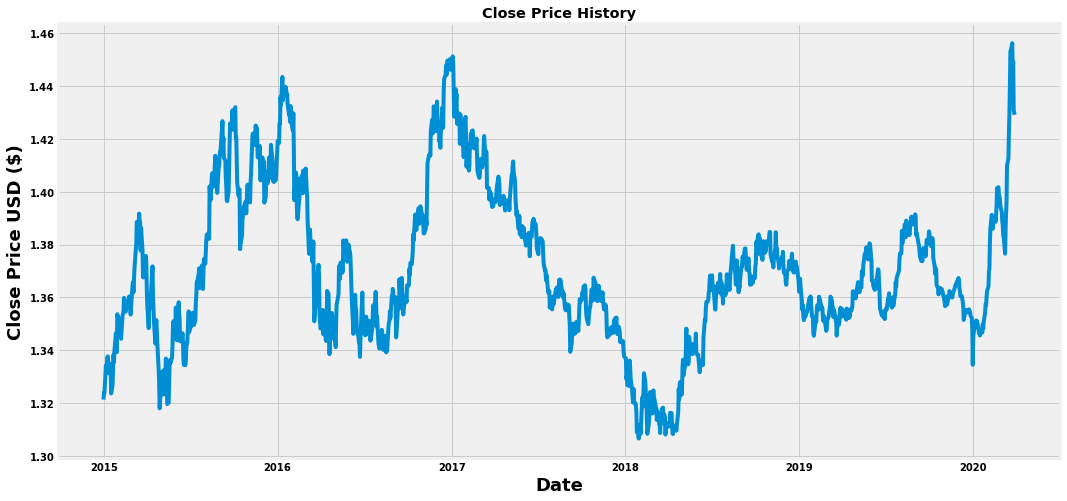

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1093

In [6]:
data

,Close
Date,
2014-12-31,1.32134
2015-01-01,1.32390
2015-01-02,1.32378
2015-01-05,1.33425
2015-01-06,1.33430
...,...
2020-03-24,1.45630
2020-03-25,1.44600
2020-03-26,1.44940


In [7]:
dataset.shape

(1366, 1)

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0985238 ],
       [0.11562365],
       [0.11482181],
       ...,
       [0.95391043],
       [0.8300048 ],
       [0.81898366]])

In [9]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0985238 , 0.11562365, 0.11482181, 0.18475721, 0.18509164,
       0.18322121, 0.20486297, 0.20793576, 0.16445158, 0.18949978,
       0.17954723, 0.18201884, 0.11402076, 0.13459393, 0.17734316,
       0.21147597, 0.19324064, 0.22216268, 0.26651559, 0.24647671,
       0.2184895 , 0.31434102, 0.30806245, 0.30352054, 0.30258492,
       0.26384331, 0.27787037, 0.25235476, 0.31113525, 0.3149422 ,
       0.32168898, 0.35568802, 0.32663141, 0.32115468, 0.33758646,
       0.32990487, 0.3353816 , 0.34753902, 0.35942809, 0.35268211,
       0.33872194, 0.31360607, 0.33411235, 0.3864136 , 0.39569808,
       0.36978196, 0.40284538, 0.42889608, 0.48226592, 0.49602543,
       0.54805993, 0.5405782 , 0.49415579, 0.56903363, 0.55193378,
       0.54752564, 0.47565292, 0.53283052, 0.47531928, 0.40818914])]
[0.40752106725356896]

[array([0.0985238 , 0.11562365, 0.11482181, 0.18475721, 0.18509164,
       0.18322121, 0.20486297, 0.20793576, 0.16445158, 0.18949978,
       0.17954723, 0.18201884, 0.11

In [10]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1033, 60, 1)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1033/1033 [==============================] - 27s 26ms/step - loss: 0.0048


In [15]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [16]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [17]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [18]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.006135807715240106

C:\Users\tanck\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


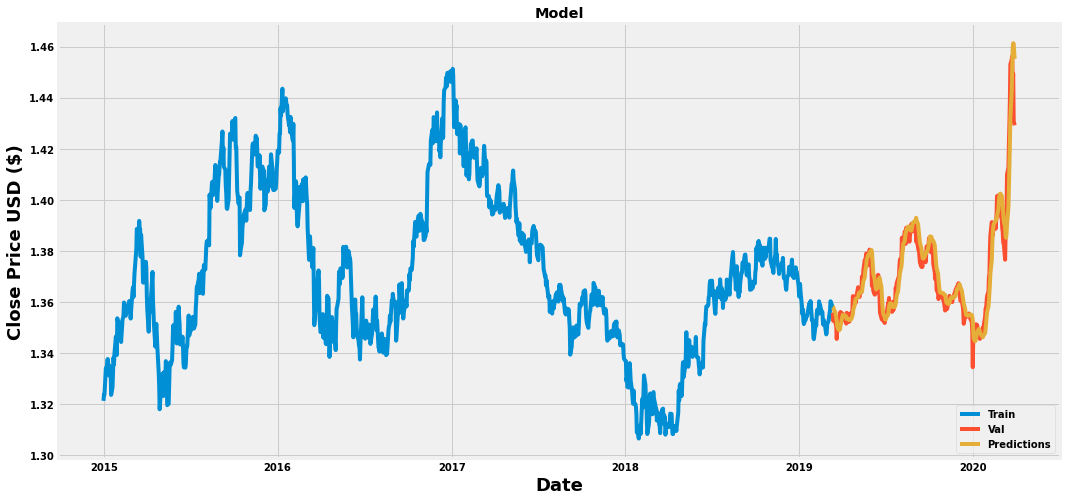

In [20]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-13,1.35570,1.358204
2019-03-14,1.35261,1.358089
2019-03-15,1.35543,1.356968
2019-03-18,1.35293,1.356178
2019-03-19,1.35126,1.355135
...,...,...
2020-03-24,1.45630,1.452647
2020-03-25,1.44600,1.459756
2020-03-26,1.44940,1.461336


In [22]:
#Get the quote
usdsgd_quote = web.DataReader('SGD=X', data_source='yahoo', start='2015-01-01', end='2020-03-30')
#Create a new dataframe
new_df = usdsgd_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print("Predicted Price : "+ str(pred_price))

Predicted Price : [[1.4480325]]


In [23]:
#Get the quote
usdsgd_quote2 = web.DataReader('SGD=X', data_source='yahoo', start='2020-03-31', end='2020-03-31')
print(usdsgd_quote2['Close'])

Date
2020-03-29    1.42920
2020-03-31    1.42642
Name: Close, dtype: float64
